In [156]:
# import packages
import glob
import os
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np

# display options
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  # or 1000
%matplotlib inline

In [157]:
import seaborn as sns

In [433]:
# find markets with pairs
all_files_path = glob.glob('data/*[!ipynb]')
pair_files = [f for f in all_files_path if Path(f'{f}/pairs').is_dir()]
all_files = [os.path.basename(x) for x in pair_files]

In [434]:
all_files[0]

'1.169866063'

['14950773', '27358557']
14950773
27358557
['12296623', '4276645']
12296623
4276645
['19252822', '5832376']
19252822
5832376
['12174825', '14057064']
12174825
14057064
['12174825', '924701']
12174825
924701
['27431313', '27753126']
27431313
27753126
['12920875', '14792844']
12920875
14792844
['24000838', '7285599']
24000838
7285599
['16484049', '2269086']
16484049
2269086
['24270510', '24330455']
24270510
24330455
['21370067', '346313']
21370067
346313
['12574474', '14833900']
12574474
14833900


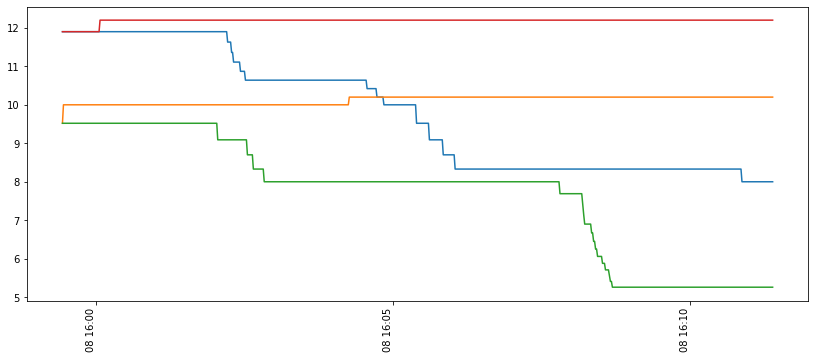

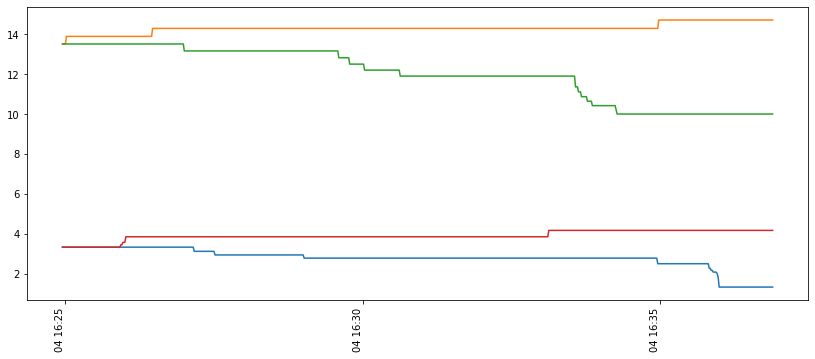

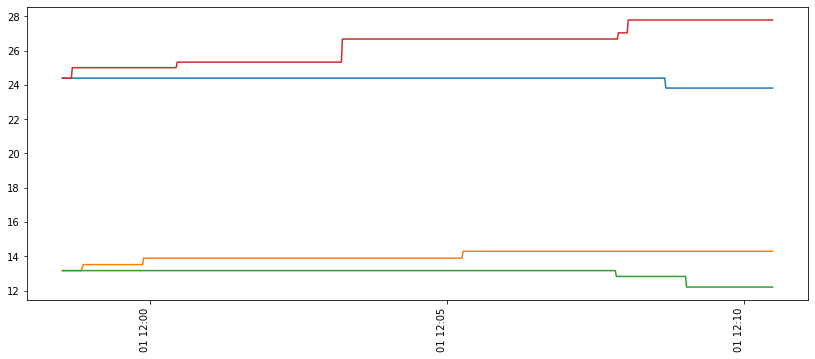

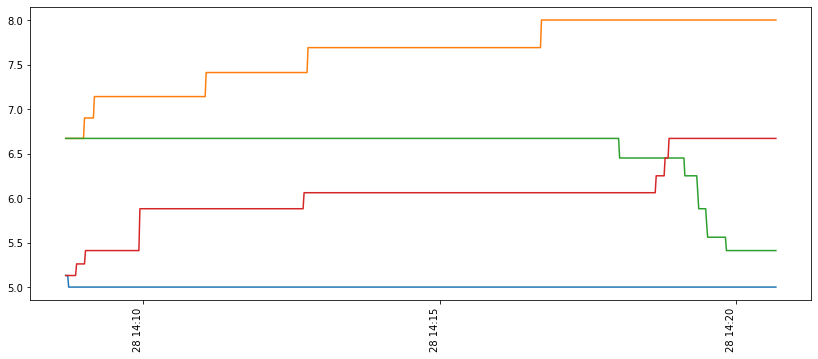

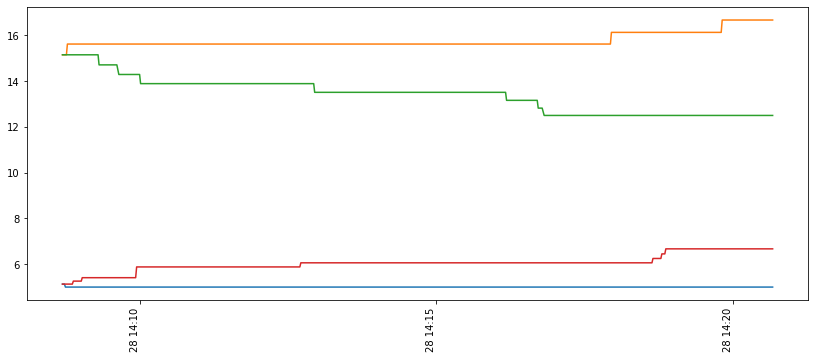

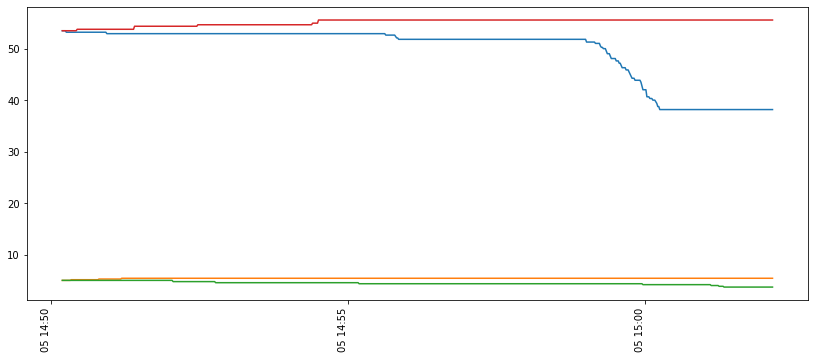

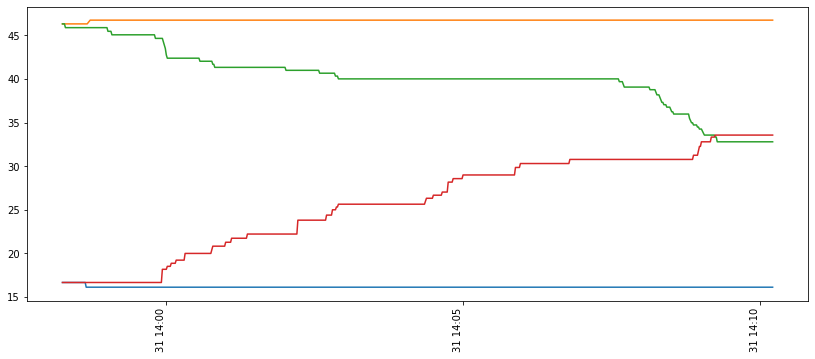

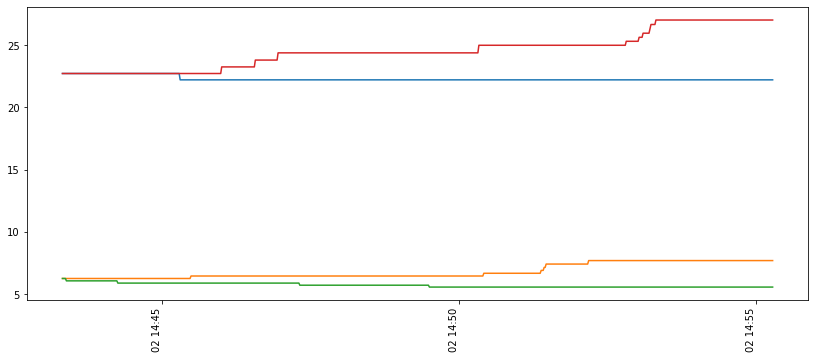

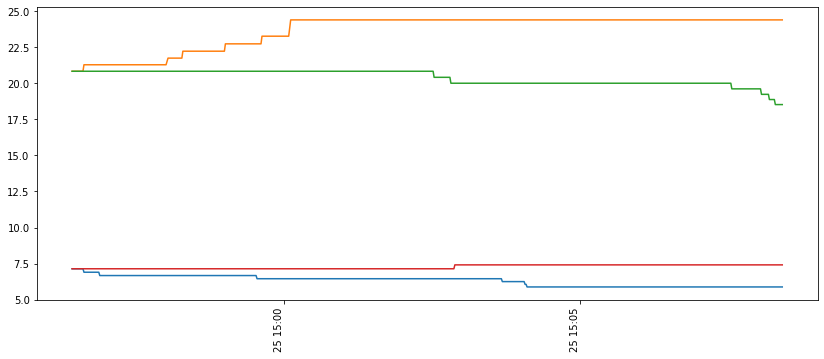

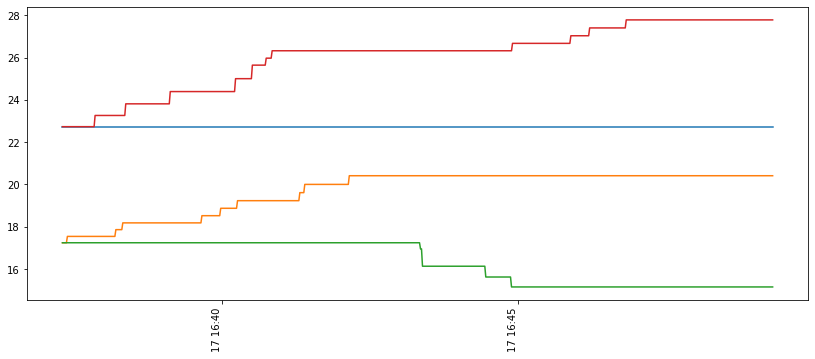

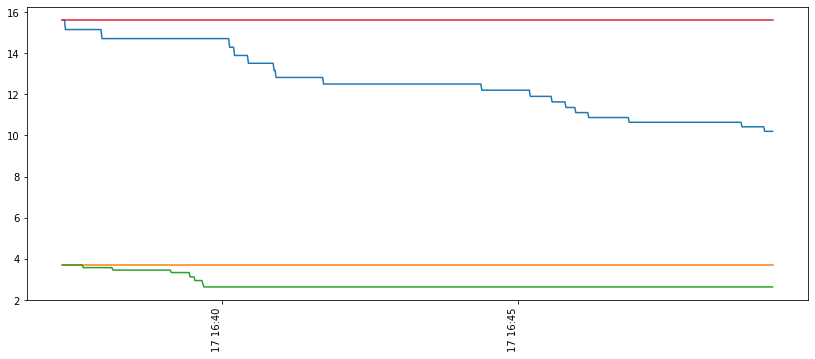

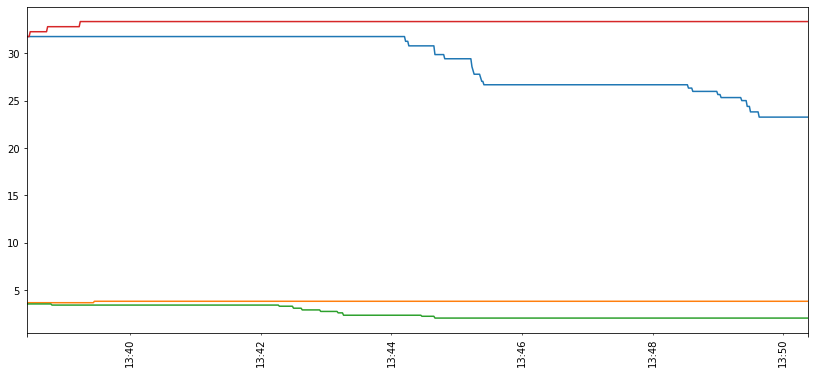

In [441]:
# 
# file_name = '1.167488006'

for file_name in all_files[0:10]:

# read in file
    with open(f'data/{file_name}/pairs/{file_name}.json') as data_file:    
        d = json.load(data_file)

    watch_df = pd.DataFrame(d['watch_df'])
    watch_df.index = watch_df.index.astype('<M8[ns]')
    react_df = pd.DataFrame(d['react_df'])
    react_df.index = react_df.index.astype('<M8[ns]')

    for pair in d['pairs']:
        print(pair)

        # define pair individuals
        p1, p2 = pair

        # plot watch / react
#         fig, ax = plt.subplots(ncols=2, figsize=(18,5))
#         watch_df[pair].plot(ax=ax[0], rot=90)
    #     react_df[pair].plot(ax=ax[1], rot=90)

        # create react_df of pair
        pair_df = react_df[pair].copy()

    #     display(pair_df)

        # find min_threshold from watch
    #     p1_ds = abs(watch_df[p1].diff(1).fillna(0))
    #     p2_ds = abs(watch_df[p2].diff(1).fillna(0))
    #     p1_min = round(np.min(p1_ds[p1_ds.ne(0)]),2)
    #     p2_min = round(np.min(p2_ds[p2_ds.ne(0)]),2)
    #     print(p1_min, p2_min)

        # create triggers
    #     pair_df[f'{p1}_trigger'] = abs(pair_df[f"{p1}"].diff(1)).gt(p1_min)
    #     pair_df[f'{p2}_trigger'] = abs(pair_df[f"{p2}"].diff(1)).gt(p2_min)

    #     pair_df[f'{p1}_pos_trigger'] = pair_df[p1].diff(1).rolling(5).sum().gt(0.8)
    #     pair_df[f'{p2}_neg_trigger'] = pair_df[p2].diff(1).rolling(5).sum().lt(-0.8)
    #     pair_df[f'{p2}_pos_trigger'] = pair_df[p2].diff(1).rolling(5).sum().gt(0.8)
    #     pair_df[f'{p1}_neg_trigger'] = pair_df[p1].diff(1).rolling(5).sum().lt(-0.8)

    #     p1_min = watch_df[p1].min()
    #     p1_max = watch_df[p1].max()
    #     p1_min = watch_df[p1].min()
    #     p1_max = watch_df[p1].min()


        for p in pair:

            pair_df[f'{p}_wmin'] = min(watch_df[p])
            pair_df[f'{p}_wmax'] = max(watch_df[p])

            print(p)

            pair_df[f'{p}_cmin'] = pair_df[p].cummin()
            pair_df[f'{p}_cmax'] = pair_df[p].cummax()


    #         msk = (((pair_df[p] < pair_df[f'{p}_cmin']) & (pair_df[p] < pair_df[f'{p}_wmin'])) | 
    #                ((pair_df[p] > pair_df[f'{p}_cmax']) & (pair_df[p] > pair_df[f'{p}_wmax'])))
            msk = (pair_df[p] > pair_df[f'{p}_cmax'].shift(1)) & (pair_df[p] > pair_df[f'{p}_wmax'])

            pair_df[f'{p}_flag_max'] = np.where(msk, 1, 0)


    #     display(pair_df[f'{p}_flag_max'].value_counts())
    #     display(pair_df[[col for col in pair_df.columns if p in col]])

#         pair_df[[f'{p1}_cmin', f'{p2}_cmax', f'{p2}_cmin', f'{p1}_cmax']].plot(ax=ax[1],rot=90,legend=False)
        pair_df[[f'{p1}_cmin', f'{p2}_cmax', f'{p2}_cmin', f'{p1}_cmax']].plot(rot=90,
                                                                               legend=False,
                                                                               figsize=(14,6))

    #     print(pair_df.index)

In [ ]:
as new price is dicovered by opposite side of opposing pair...

In [304]:
test_w = pd.Series([1,1,1,1,1,1,1,8,8,8,8,8,8,8,8])
test_r = pd.Series([4,2,1,0,-1,2,4,5,5,6,6,9,10,9, 7])

In [406]:
test_df = pd.DataFrame({'w' : test_w,
                        'r' : test_r})

test_df['r_cmax'] = test_df['r'].cummax()
test_df['r_cmin'] = test_df['r'].cummin()

msk = ((test_df['r'] < test_df['r_cmin']) | (test_df['r'] < test_df['w'].min()) | 
      (test_df['r'] > test_df['r_cmax']) | (test_df['r'] > test_df['w'].max()))
                                            
test_df['flag_com'] = np.where(msk, 1, 0)

test_df['r_cmax_shift'] = test_df['r_cmax'].shift(1)


test_df

,w,r,r_cmax,r_cmin,flag_com,r_cmax_shift
0,1,4,4,4,0,NaN
1,1,2,4,2,0,4.0
2,1,1,4,1,0,4.0
3,1,0,4,0,1,4.0
4,1,-1,4,-1,1,4.0
5,1,2,4,-1,0,4.0
6,1,4,4,-1,0,4.0
7,8,5,5,-1,0,4.0
8,8,5,5,-1,0,5.0
9,8,6,6,-1,0,5.0


In [ ]:
check if shift works, you know what problem is

In [ ]:
# IF new price is within range of previous prices

In [209]:
# round(np.mean(abs(watch_df[p1].diff(1).fillna(0).ne(0))), 2)
np.mean(abs(pd.Series([0,5,5,5,5]).diff(1).fillna(0).ne(0)))

0.2

In [221]:
difs = abs(pd.Series([0,5,5,5,-10]).diff(1).fillna(0))
print(difs)

np.mean(difs[difs.ne(0)])
# np.mean()

0     0.0
1     5.0
2     0.0
3     0.0
4    15.0
dtype: float64


10.0

In [ ]:
# how about change >/< last 10 second mean?

# for now, take mean pos/neg change (from watch data)
# if second change is > than the mean neg/posthis then act
#(what about 2/3/5 second cum sum? - think second or you may miss)

In [ ]:
# Improvements
# Data Analysis - what makes up large spikes? does it start with a big ones second move / bigger than normal?

# has to be a way to speed up 'new_price_flag' - this would be very important